<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv") #import data

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Look at the data for Survived column
data.Survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [4]:
#Look at if there are any null values
data.info()
#We can see Cabin and Age column have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Preprocessing the data
#Firstly select features
#Secondly processing nullvalues(Age is an important feature here)
#Transforming categorical variables Sex and Embarked into numerical variables

#Remove columns that have many null values and are not that related to predict Survived categories 
data.drop(["Cabin","Name","Ticket"],inplace=True,axis=1) 

#Processing null values and fill null values where contain many null values
data["Age"] = data["Age"].fillna(data["Age"].mean())
data = data.dropna()  #Remove null values

#Transform categorcal data into numerical data to make preparations to build model later
data["Sex"] = (data["Sex"]== "male").astype("int")

#Using lambda to tranform "Embarked" into numerical data
labels = data["Embarked"].unique().tolist()
data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))

#Look at the data after data cleaning
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [6]:
data.info() #No null values now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int32  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int32(1), int64(6)
memory usage: 66.0 KB


In [8]:
#Now seperate features and labels
data.columns #Extract all column names

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [10]:
X = data.iloc[:,data.columns != "Survived"] #Extract all rows and columnsthat are not equal to "Survived"
                                            #X is the feature column
y = data.iloc[:,data.columns == "Survived"] #Extract all rows and columns that are equal to "Survived"
                                            #y si the label column

In [11]:
#Split the training datasets and testing datasets
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.3)

In [12]:
#Look at the X training data
Xtrain

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
361,362,2,1,29.000000,1,0,27.7208,1
330,331,3,0,29.699118,2,0,23.2500,2
33,34,2,1,66.000000,0,0,10.5000,0
420,421,3,1,29.699118,0,0,7.8958,1
41,42,2,0,27.000000,1,0,21.0000,0
...,...,...,...,...,...,...,...,...
326,327,3,1,61.000000,0,0,6.2375,0
280,281,3,1,65.000000,0,0,7.7500,2
59,60,3,1,11.000000,5,2,46.9000,0
747,748,2,0,30.000000,0,0,13.0000,0


In [13]:
#Look at the index of Xtrain
Xtrain.index

Int64Index([361, 330,  33, 420,  41, 795, 270, 391, 560, 767,
            ...
            773, 726, 136, 874, 431, 326, 280,  59, 747, 669],
           dtype='int64', length=622)

In [14]:
Xtrain.shape  #Look at the number of rows and columns

(622, 8)

In [15]:
Xtrain.shape[0]  #Extract number 622

622

In [17]:
#Changing the index number to make the data processing more easily later
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index=range(i.shape[0]) #this is to change the index number from 0-622

In [18]:
Xtrain.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,362,2,1,29.000000,1,0,27.7208,1
1,331,3,0,29.699118,2,0,23.2500,2
2,34,2,1,66.000000,0,0,10.5000,0
3,421,3,1,29.699118,0,0,7.8958,1
4,42,2,0,27.000000,1,0,21.0000,0


In [19]:
#Start running the model
clf = DecisionTreeClassifier(random_state=25) 
clf = clf.fit(Xtrain, Ytrain)  #fit the model and get the relationship
score= clf.score(Xtest, Ytest)  #Test the model

score #分类模型分数就是精确度

0.7565543071161048

0.8166624106230849


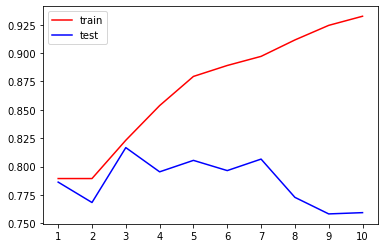

In [20]:
#Look at the model overfitting situation under different max_depth parameter
tr=[]
te=[]
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25
                                 ,max_depth=i+1
                                 ,criterion="entropy"
                                )
    clf=clf.fit(Xtrain,Ytrain)
    score_tr=clf.score(Xtrain,Ytrain)
    score_te=cross_val_score(clf,X,y,cv=10).mean()   #Using cross_val_score to test the model for testing datasets
                                                   
    
#The scores will be appended to the above sets
    tr.append(score_tr)
    te.append(score_te)
print(max(te)) #print max testing scores

plt.plot(range(1,11),tr,color="red",label="train")#，y axis is the scores for training datasets
plt.plot(range(1,11),te,color="blue",label="test")

#Drawing two lines to look at the model fitting outcomes for training and testing datasets under different max_depth
#If the scores for training datasets is much higher than scores for testing datasets, the model is overfitting

plt.xticks(range(1,11)) 
plt.legend()
plt.show()

#It shows that with the increase of max_depth, the overfitting problems is getting serious.
#the variance is low when max_depth=3 
